## Interest Point Detection

- Corresponds to lectures 9 and 10

- An interest point is a point that has a well degined position and can be robustly detected

- Detecting interest points helps in:

  - Image Matching
  
  <img width=300 src="https://production-media.paperswithcode.com/tasks/image_matching_4Ht6D90.png">
 
 
  - Motion Tracking
  
  
  <img width=400 src="https://www.awn.com/sites/default/files/styles/original/public/image/featured/1041074-optitrack-releases-motive-20-motion-tracking-software.jpg?itok=Xy1Ip1HJ">

  - Image Stitching
  
  <img width="450" src="https://pyimagesearch.com/wp-content/uploads/2018/12/image_stitching_opencv_header.jpg">

  - And more!

### Harris Corner Detection

- Corners in an image are a well known interest point.

<img src="https://i.imgur.com/VXW6bOW.png" width=700>

The cornerner of a point is then $min(λ_{1}, λ_{2})$ (or a similar equation).

#### Load Image

(-0.5, 1279.5, 965.5, -0.5)

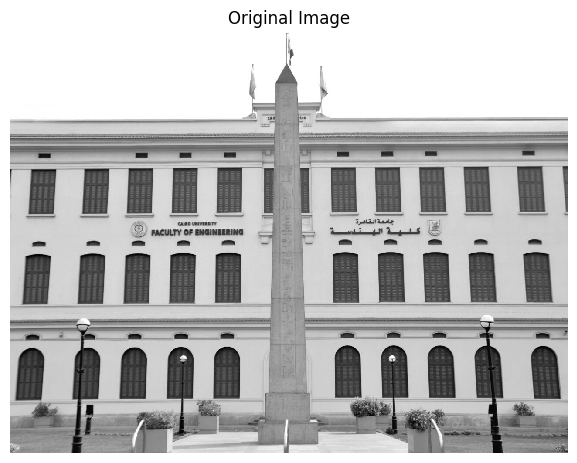

In [1]:
import skimage as ski
import matplotlib.pyplot as plt

#Load the image
image = ski.io.imread('./cufe.jpeg')
#Turn image to grayscale
gray_image = ski.color.rgb2gray(image)
#Denoise the image
gray_image = ski.filters.gaussian(gray_image, sigma=0.1)
#Display obtained image
ski.io.imshow(gray_image)
plt.title('Original Image')
plt.axis('off')

#### Measure Cornerness of each point

In [3]:
corners = ski.feature.corner_harris(gray_image)    #      get the cornerness of the image
print(corners.shape)
corners[0:10,0:10]

(966, 1280)


array([[ 6.92999351e+00,  7.37185334e+00,  5.59818993e-01,
        -1.81568670e+00, -2.03050019e+00, -2.03719541e+00,
        -2.03719541e+00, -2.03719541e+00, -2.03719541e+00,
        -2.03719541e+00],
       [ 7.37185334e+00,  8.09443270e+00,  1.69655411e+00,
        -5.40582313e-01, -7.43120822e-01, -7.49442311e-01,
        -7.49442311e-01, -7.49442311e-01, -7.49442311e-01,
        -7.49442311e-01],
       [ 5.59818993e-01,  1.69655411e+00,  5.63131505e-01,
         1.60652986e-02, -3.56906135e-02, -3.73125356e-02,
        -3.73125356e-02, -3.73125356e-02, -3.73125356e-02,
        -3.73125356e-02],
       [-1.81568670e+00, -5.40582313e-01,  1.60652986e-02,
         4.00586855e-03, -1.15245447e-04, -2.51409887e-04,
        -2.51409887e-04, -2.51409887e-04, -2.51409887e-04,
        -2.51409887e-04],
       [-2.03050019e+00, -7.43120822e-01, -3.56906135e-02,
        -1.15245447e-04,  3.66766872e-06, -2.29256142e-07,
        -2.29256142e-07, -2.29256142e-07, -2.29256142e-07,
        -2.

#### Extract Corners Far Apart + High Strength

In [4]:
coords = ski.feature.corner_peaks(corners, min_distance=5, threshold_rel=0.02)      # minumum cornerner = 0.02*max
print(coords.shape)

(364, 2)


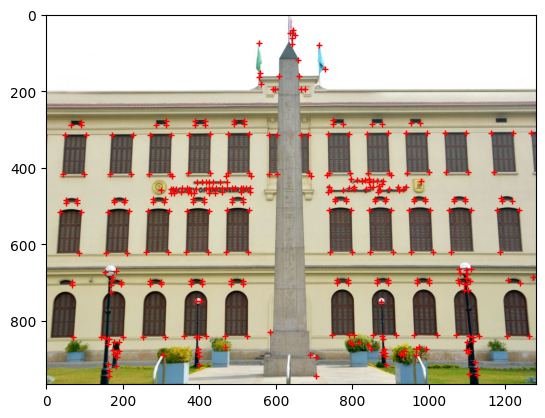

In [5]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot( coords[:, 1], coords[:, 0], marker='+', color="r", linestyle='None', markersize=5)
plt.show()

Remember the Laplacian of Gaussian?

- Laplacian filter followed by Gaussian filter with $\sigma$

- Turns out if you choose $\sigma$ correctly it can do blob detection (e.g., detect Sunflower blobs)

<img src="https://i.imgur.com/9vwdHbb.png" width=800>

<img src="https://i.imgur.com/ZBos2zN.png" width=800>

### Scale Invariant Feature Transform (SIFT)

- Original purpose was to detect key points for applications such as matching
- SIFT provides both detection and matching

Steps:
- Construct a Scale Space by Blurring Image Repeatedly (e.g., five times)

- Get DoG from each pair and use it to find key points (finding min/max values) at intermediate scales (two)

- Discard low contrast or edge key points

  - Now have a set of key point for each intermediate scale

- Generate SIFT features for each key point (windowing, histogram      of angles, etc.)

- Match two key points by comparing their feature vectors

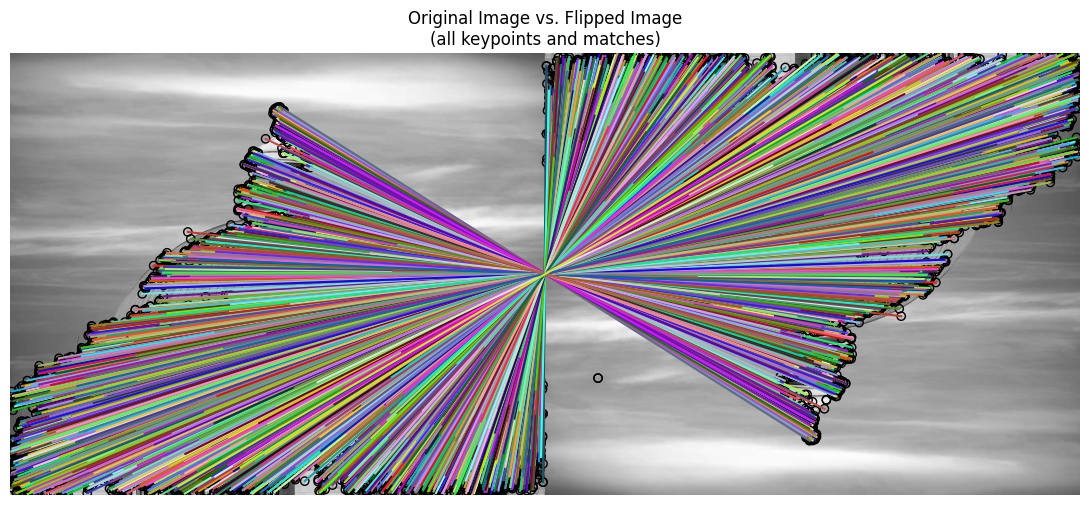

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

img1 = rgb2gray(ski.io.imread("./CU.jpeg"))
img2 = transform.rotate(img1, 180)

descriptor_extractor = SIFT()

# Apply SIFT on first image  
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

# Apply SIFT on second image
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors
       
# Match both images using feature vectors of keypoints
matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6, cross_check=True)

# plot!
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
 
plt.gray()

plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Flipped Image\n" "(all keypoints and matches)")

plt.tight_layout()
plt.show()

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExcmZla3ozbW43c3FpbGI5OGRrbnlnd2xpZmVraGx4Z2lmODVhczYwNiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/26u4lOMA8JKSnL9Uk/giphy.gif">

Skimage [API Reference](https://scikit-image.org/docs/stable/api/api.html)

Interesting OpenCV [Playlist](https://www.youtube.com/playlist?list=PLzMcBGfZo4-lUA8uGjeXhBUUzPYc6vZRn)